<a href="https://colab.research.google.com/github/tkono17/CodeBox/blob/main/Trial_kaihen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Project Name    : Machine Learning

 File Name       : Trial.ipynb

 Creation Date   : Jun 9 2021

 Modify Date     : Jun 2 2023

 Copyright (c) 2021 KAMAKE no SUSUME. All rights reserved.

 This source code or any portion thereof must not be reproduced or used in any manner whatsoever.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
!ls datasets/dice_top_crop/1

ls: cannot access 'datasets/dice_top_crop/1': No such file or directory


In [ ]:
!find datasets/dice_top_crop/5 -type f | wc -l

find: ‘datasets/dice_top_crop/5’: No such file or directory
0


In [ ]:
%cd /content/drive/MyDrive/Colab/Trial

/content/drive/MyDrive/Colab/Trial


In [ ]:
!pwd

/content/drive/MyDrive/Colab/Trial


In [ ]:
%run prepare_images.py datasets/dice_top_crop

Copied images from datasets/dice_top_crop/4
Copied images from datasets/dice_top_crop/3
Copied images from datasets/dice_top_crop/2
Copied images from datasets/dice_top_crop/5
Copied images from datasets/dice_top_crop/1
Copied images from datasets/dice_top_crop/6


In [ ]:
!find ./target_datasets/train -type f | wc -l

72


In [ ]:
!find ./target_datasets/val -type f | wc -l

22


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img, ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
import shutil
import math
from IPython.display import Image as IPImage
from IPython.display import display_jpeg
import visualize

print(tf.__version__)

train_dir = 'target_datasets/train'
val_dir = 'target_datasets/val'

backup_dir = './model'

labels = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
labels.sort()

if os.path.exists(backup_dir):
    shutil.rmtree(backup_dir)

os.makedirs(backup_dir)

with open(backup_dir + '/labels.txt','w') as f:
    for label in labels:
        f.write(label+"\n")

NUM_CLASSES = len(labels)
print("class number=" + str(NUM_CLASSES))

labels = []
with open(backup_dir + '/labels.txt','r') as f:
    for line in f:
        labels.append(line.rstrip())
print(labels)

2.12.0
class number=6
['1', '2', '3', '4', '5', '6']


Found 72 images belonging to 6 classes.
Found 22 images belonging to 6 classes.
## Train Data Sample ##


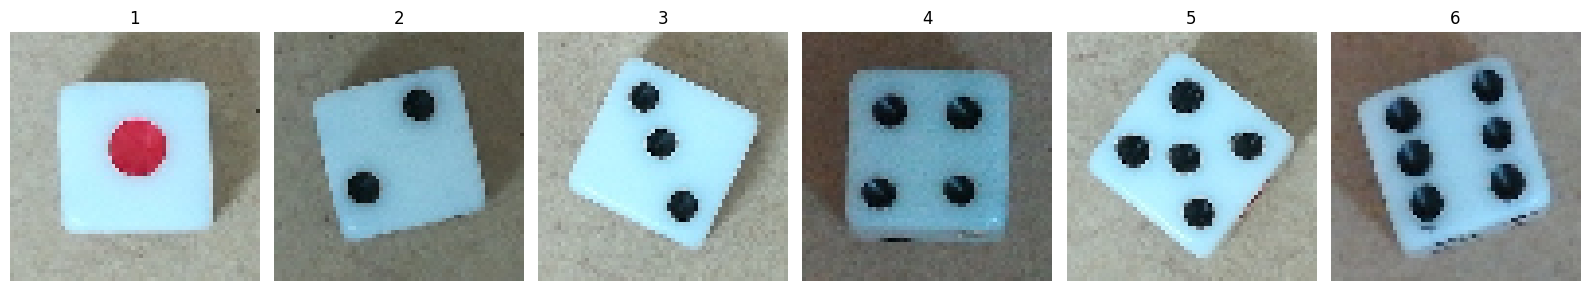

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 64, 64, 8)         224       
                                                                 
 activation_78 (Activation)  (None, 64, 64, 8)         0         
                                                                 
 conv2d_49 (Conv2D)          (None, 62, 62, 8)         584       
                                                                 
 activation_79 (Activation)  (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 31, 31, 8)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 31, 31, 8)         0         
                                                     

In [ ]:
# 学習率
LEARNING_RATE = 0.001
# エポック（世代数）
EPOCHS = 20
# バッチサイズ
BATCH_SIZE = 16

IMAGE_SIZE = 64

train_data_gen = ImageDataGenerator(rescale=1./255)
#train_data_gen = ImageDataGenerator(rescale=1./255, rotation_range=180)
val_data_gen = ImageDataGenerator(rescale=1./255)

# メモ：ImageDataGenerator.flow_from_directory はIteratorを返す
train_data = train_data_gen.flow_from_directory(
    train_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=True)

validation_data = val_data_gen.flow_from_directory(
    val_dir, target_size=(IMAGE_SIZE, IMAGE_SIZE),
    color_mode='rgb', batch_size=BATCH_SIZE,
    class_mode='categorical', shuffle=False)

# Display train data sample
visualize.pick_train_sample(labels, train_data)

# AI model definition
model = Sequential()

model.add(Conv2D(8, (3, 3), padding='same',
    input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(8, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
#model.add(Dropout(0.5))
model.add(Dense(NUM_CLASSES))
model.add(Activation('softmax'))

opt = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)
#opt = tf.keras.optimizers.SGD(learning_rate=LEARNING_RATE)

model.compile(opt, loss='categorical_crossentropy',
    metrics=['accuracy'])

model.summary()

# Execute train
history = model.fit(train_data, epochs=EPOCHS, validation_data=validation_data, verbose=1)

score = model.evaluate(validation_data)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 [==============================] - 0s 17ms/step
Prediction data
[[0.997 0.    0.003 0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [0.995 0.    0.005 0.    0.    0.   ]
 [0.998 0.    0.002 0.    0.    0.   ]
 [0.001 0.446 0.072 0.434 0.012 0.035]
 [0.001 0.396 0.126 0.454 0.006 0.017]
 [0.001 0.679 0.035 0.238 0.003 0.045]
 [0.    0.291 0.022 0.656 0.006 0.025]
 [0.003 0.013 0.684 0.007 0.286 0.008]
 [0.01  0.12  0.49  0.144 0.222 0.014]
 [0.007 0.134 0.737 0.04  0.08  0.003]
 [0.003 0.069 0.647 0.02  0.26  0.001]
 [0.    0.086 0.003 0.515 0.042 0.353]
 [0.    0.066 0.004 0.273 0.101 0.556]
 [0.    0.071 0.001 0.856 0.004 0.068]
 [0.    0.03  0.004 0.215 0.08  0.671]
 [0.001 0.009 0.58  0.065 0.31  0.036]
 [0.    0.022 0.054 0.248 0.534 0.142]
 [0.    0.009 0.041 0.051 0.82  0.08 ]
 [0.    0.076 0.008 0.551 0.074 0.29 ]
 [0.    0.065 0.008 0.408 0.153 0.366]
 [0.    0.03  0.    0.777 0.003 0.189]]
(22, 6)
#0 Expected:1 -> Predicted:1
File: 1/IMG_20210418_174728.jpg
Each

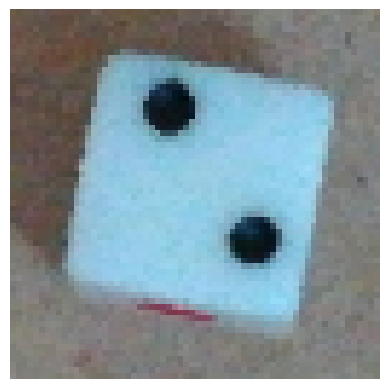

#6 Expected:2 -> Predicted:2
File: 2/IMG_20210418_180612.jpg
Each Prediction Value: [0.001 0.679 0.035 0.238 0.003 0.045]
* Correct *
#7 Expected:2 -> Predicted:4
File: 2/IMG_20210418_180621.jpg
Each Prediction Value: [0.    0.291 0.022 0.656 0.006 0.025]
**** INCORRECT ****


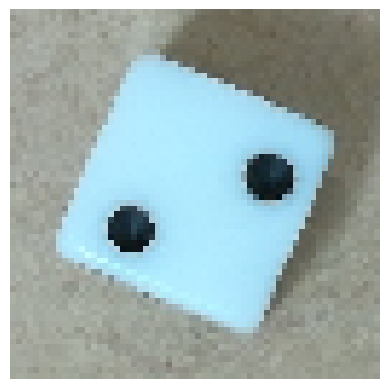

#8 Expected:3 -> Predicted:3
File: 3/IMG_20210418_175032.jpg
Each Prediction Value: [0.003 0.013 0.684 0.007 0.286 0.008]
* Correct *
#9 Expected:3 -> Predicted:3
File: 3/IMG_20210418_180654.jpg
Each Prediction Value: [0.01  0.12  0.49  0.144 0.222 0.014]
* Correct *
#10 Expected:3 -> Predicted:3
File: 3/IMG_20210418_180700.jpg
Each Prediction Value: [0.007 0.134 0.737 0.04  0.08  0.003]
* Correct *
#11 Expected:3 -> Predicted:3
File: 3/IMG_20210418_180706.jpg
Each Prediction Value: [0.003 0.069 0.647 0.02  0.26  0.001]
* Correct *
#12 Expected:4 -> Predicted:4
File: 4/IMG_20210418_174855.jpg
Each Prediction Value: [0.    0.086 0.003 0.515 0.042 0.353]
* Correct *
#13 Expected:4 -> Predicted:6
File: 4/IMG_20210418_175106.jpg
Each Prediction Value: [0.    0.066 0.004 0.273 0.101 0.556]
**** INCORRECT ****


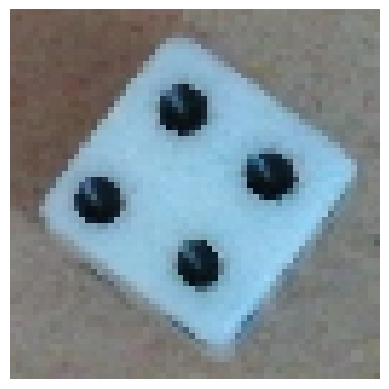

#14 Expected:4 -> Predicted:4
File: 4/IMG_20210418_180722.jpg
Each Prediction Value: [0.    0.071 0.001 0.856 0.004 0.068]
* Correct *
#15 Expected:4 -> Predicted:6
File: 4/IMG_20210418_180742.jpg
Each Prediction Value: [0.    0.03  0.004 0.215 0.08  0.671]
**** INCORRECT ****


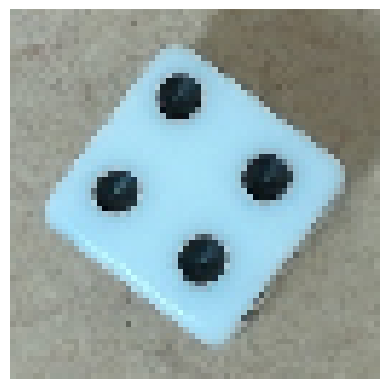

#16 Expected:5 -> Predicted:3
File: 5/IMG_20210418_174937.jpg
Each Prediction Value: [0.001 0.009 0.58  0.065 0.31  0.036]
**** INCORRECT ****


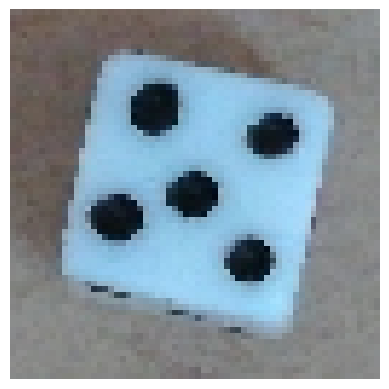

#17 Expected:5 -> Predicted:5
File: 5/IMG_20210418_180820.jpg
Each Prediction Value: [0.    0.022 0.054 0.248 0.534 0.142]
* Correct *
#18 Expected:5 -> Predicted:5
File: 5/IMG_20210418_180823.jpg
Each Prediction Value: [0.    0.009 0.041 0.051 0.82  0.08 ]
* Correct *
#19 Expected:6 -> Predicted:4
File: 6/IMG_20210418_174953.jpg
Each Prediction Value: [0.    0.076 0.008 0.551 0.074 0.29 ]
**** INCORRECT ****


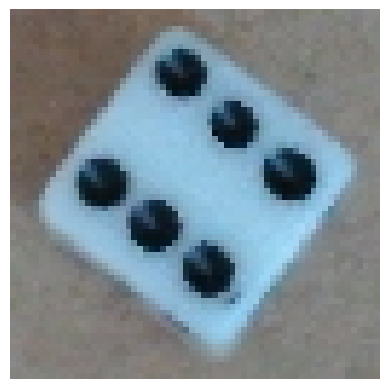

#20 Expected:6 -> Predicted:4
File: 6/IMG_20210418_180840.jpg
Each Prediction Value: [0.    0.065 0.008 0.408 0.153 0.366]
**** INCORRECT ****


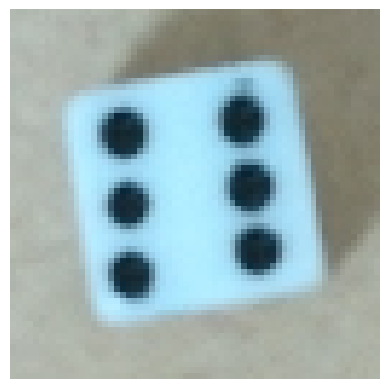

#21 Expected:6 -> Predicted:4
File: 6/IMG_20210418_180854.jpg
Each Prediction Value: [0.    0.03  0.    0.777 0.003 0.189]
**** INCORRECT ****


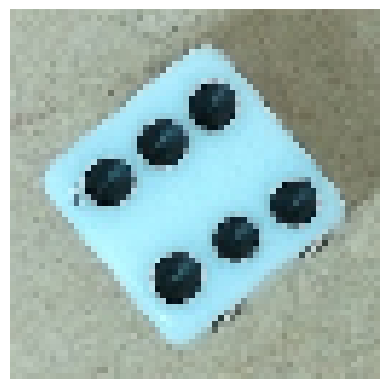

Loss


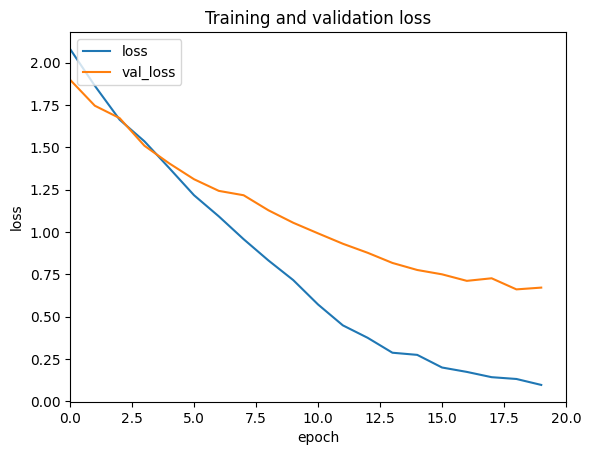

Accuracy


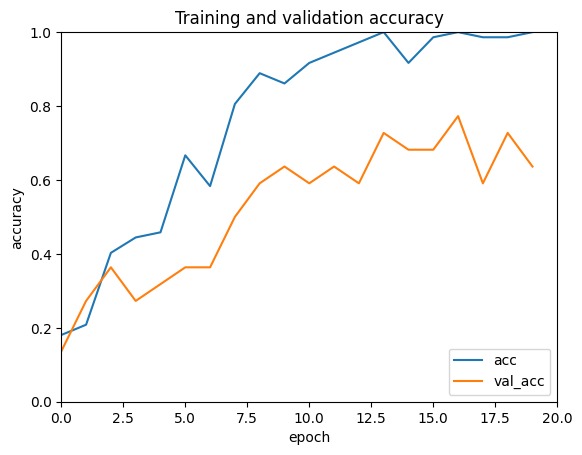

22/22 [==============================] - 0s 4ms/step
Confusion Matrix


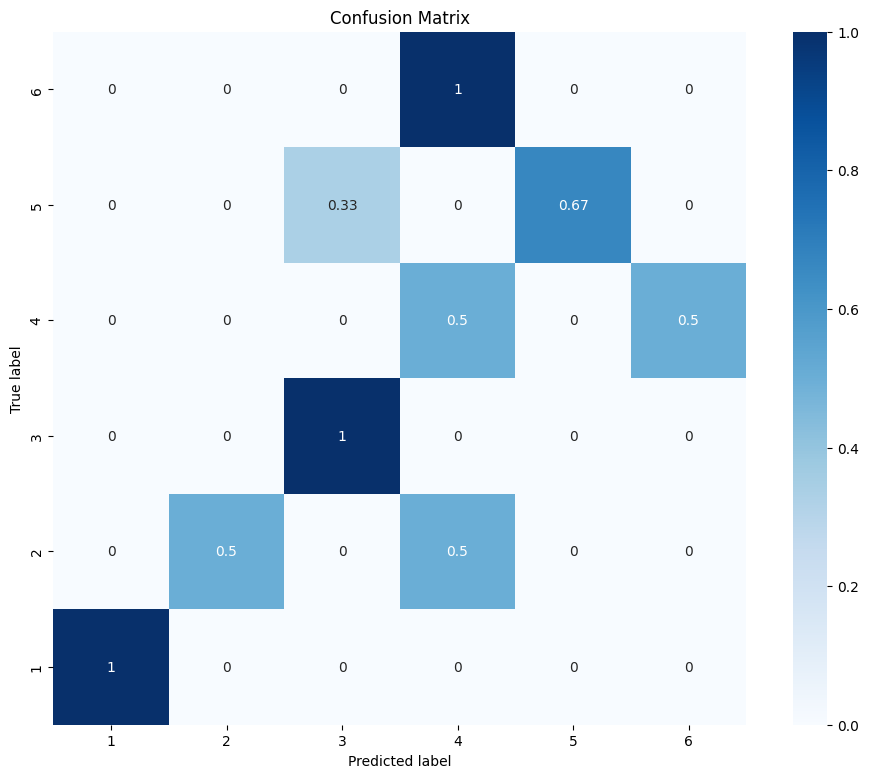

In [ ]:
# Failed pictures
visualize.vis_failed_pic(model, labels, validation_data, val_dir, BATCH_SIZE, 100)

# Visualize loss
name = "%s_%s_%s" % (LEARNING_RATE,EPOCHS,BATCH_SIZE)
visualize.vis_loss_accuracy(history, EPOCHS)

# Save model
save_model_path = os.path.join(backup_dir, 'my_model.h5')
model.save(save_model_path)

# Confusion Matrix
visualize.vis_confusion_matrix(model, validation_data)

In [ ]:
visualize.vis_filter(model, 'conv2d')
visualize.vis_filter(model, 'conv2d_1')

Visualize filter: conv2d


ValueError: ignored

In [ ]:
!cat incorrect.txt

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 8)         224       
                                                                 
 activation (Activation)     (None, 64, 64, 8)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 8)         584       
                                                                 
 activation_1 (Activation)   (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 8)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 7688)              0         
                                                        

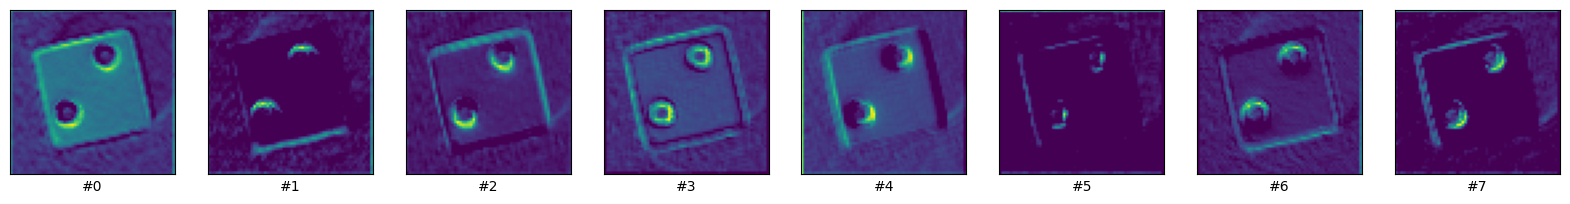

1/1 [==============================] - 0s 31ms/step
target_datasets/val/4/IMG_20210418_174849.jpg


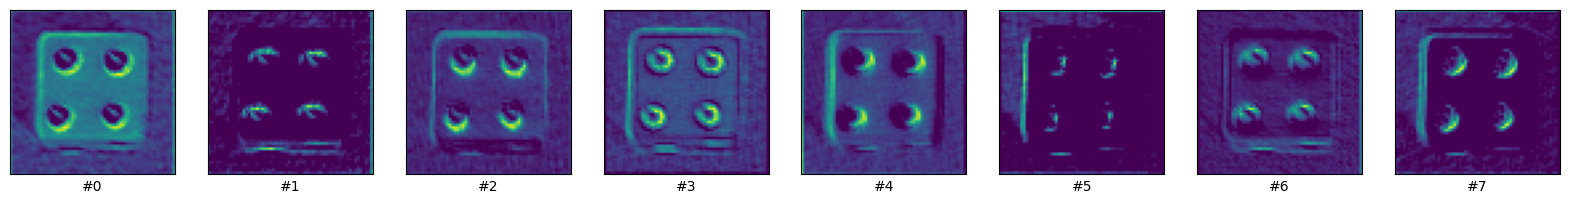

1/1 [==============================] - 0s 31ms/step
target_datasets/val/4/IMG_20210418_175106.jpg


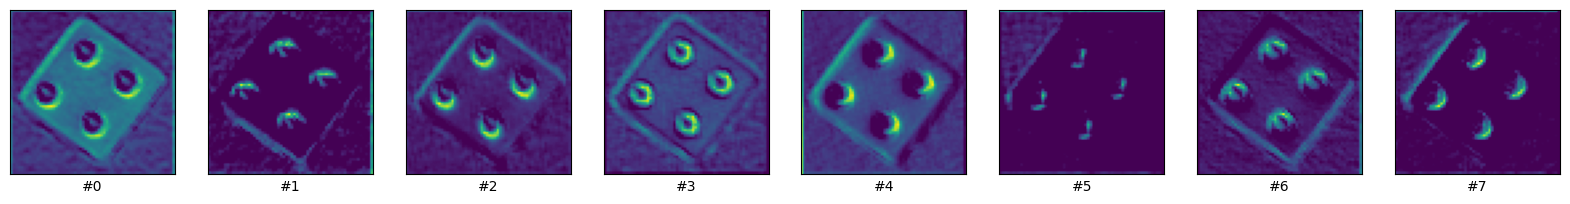

1/1 [==============================] - 0s 37ms/step
target_datasets/val/4/IMG_20210418_175112.jpg


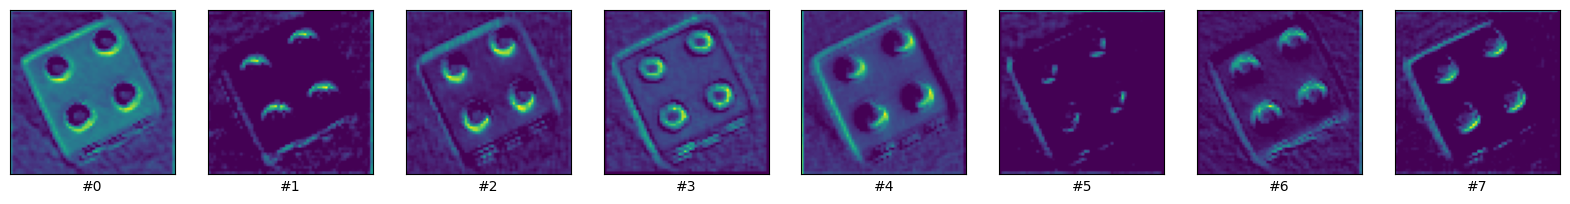

1/1 [==============================] - 0s 31ms/step
target_datasets/val/6/IMG_20210418_180845.jpg


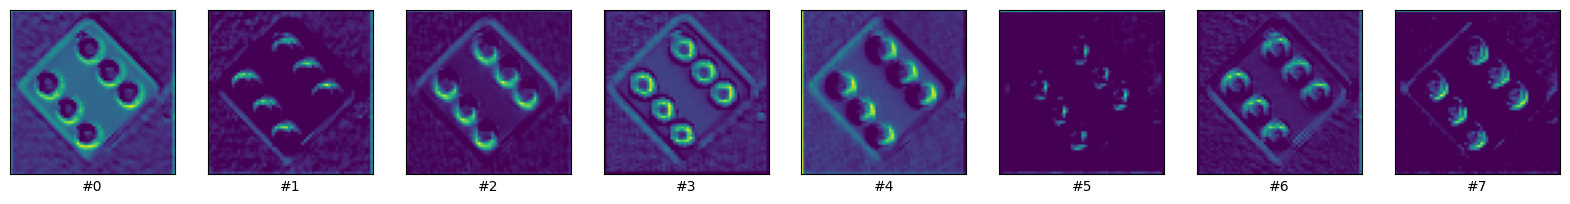

In [ ]:
visualize.vis_hidden_layer('incorrect.txt', 'activation_1', IMAGE_SIZE)